<h1>Initial Value Problems

<h2> Group 5 contributors: </h2>
<h3>- Radissa Hussein | 2301891752<br>
- Jason Christian | 2301891714<br>
- Rayhan Ali | 2301891683



In [26]:
print("The dedicated program for visualizing IVP is also included. It's an executable named \"IVPSimulator003.exe\" ")

The dedicated program for visualizing IVP is also included. It's an executable named "IVPSimulator003.exe" 


<h2>What is Initial Value Problem?</h2>

An Initial Condition is an information about Differential Equation that tells you the value of the function. A Differential Equation that has given us conditions allows us to find the specific function that satisfies a given differential equation rather than a family of functions, These type of problems is called Initial Value Problem or IVP, The Solution of Initial Value Problem is called a particular solution. And In general, we expect that every initial value problem has exactly one solution

An initial value problem consists of 
1. A first-order differential equation.
2. An initial condition. 


<h2>How to solve Initial Value Problem?</h2>

There are several ways to solve Initial Value Problems, but the 2 most commonly used are the Euler’s method and the Runge-Kutta Method. 

Usually, in Initial Value problems, they will provide you with 3 things:
A function
The intervals or step size
An initial value

They will also specify, at what x point of the function do they want you to approximate.

Let’s take a look at one example:

In this example the given information are:

$$y' = x^2$$
$$y(0) = 1$$
$$h = 0.3$$


And this problem wants you to solve for: 

$$y(1.5)$$


<h4>Let's define the coding basis for all of the initial value problem calculations:</h4>

In [27]:
# Utility to compute the initial value problems with custom function.
def compute(f: str, h: float, until: float, y0, function):

    # Sets initial values
    xVal = [0]
    yVal = [y0]

    # Sets the current value it is working with
    curX = 0
    curY = y0

    # Converts the specified string to a python mathematical formula.
    # It is of utmost importance for the string to be python-compliant, so that it doesn't run into any errors.
    functionEval = eval("lambda x, y : " + f)

    for i in range(int(until / h)):
        # Calculates the next y value based on the chosen algorithm
        curY = function(curX, curY, h, functionEval)
        curX += h # Adds the current x by the specified h
        # Appends to array
        xVal.append(curX)
        yVal.append(curY)

    return [xVal, yVal]

In [28]:
# Utility to help us to visualize the data into tables.
def printTable(plotArr):
    print("n   xn                  yn")
    for i in range(len(plotArr[0])):
        # Formats into a string, and rounds the values into sensible values.
        string = "{0: <4}{1: <20}{2: <15}".format(i, round(plotArr[0][i], 10), round(plotArr[1][i], 10))
        print(string)

<h2>Euler's Method</h2>
Let’s start with Euler’s method, one of the most common and easiest methods used for solving Initial Value Problems.

The formula for the Euler’s method is as follows:

$$y_n = y_{n-1} + f'(x_{n-1},y_{n-1})h$$

<h4> If we implement the code, it will look like this: </h4>

In [29]:
# The python code implementation of the euler's method.
def euler(x, y, h, f):
        return y + (h * f(x, y))

Now to further help ease the process of solving this problem, we can use a table like below:

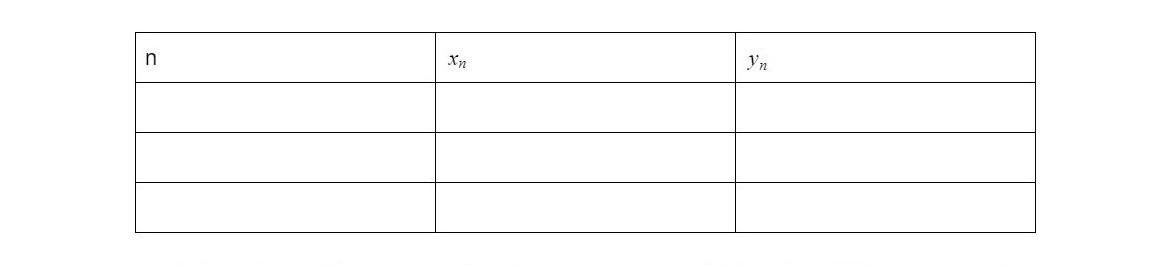

In [30]:
from IPython.display import Image
Image(filename="img/table1.jpg",width=400,height=400)

In [31]:
printTable([[], []])

n   xn                  yn


As stated in the problem, we are already provided with the initial value of this function, which is y(0) = 1, we can then put this into the table, as n = 0, or initial.

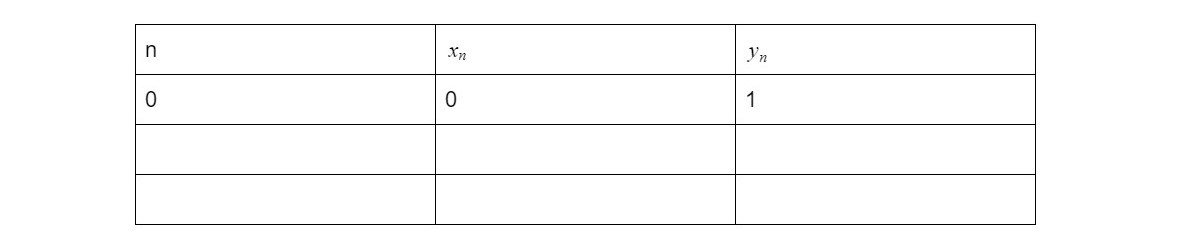

In [32]:
from IPython.display import Image
Image(filename="img/table2.jpg",width=400,height=400)

In [33]:
printTable(compute("x**2", 0.3, 0.2, 1, euler))

n   xn                  yn
0   0                   1              


Then we use the Euler’s formula for filling up the rest of the table:

The common rule for the x-column is as follow:

$$x_n = x_{n-1} + h$$


This is because we are calculating with slices of h, which in this case is 0.3. We will take slices of 0.3 until we reach our intended goal which is to find an approximation of y, on x=1.5.

For the y-column, we simply use the Euler’s formula like so:

$$y_n = y_{n-1} + f(x_{n-1},y_{n-1})h$$
$$y_1 = y_0 + f(x_0,y_0)0.3$$
$$y_1 = 1 + (0)^20.3$$
$$y_1 = 1$$


Then we can continue to fill up our table:

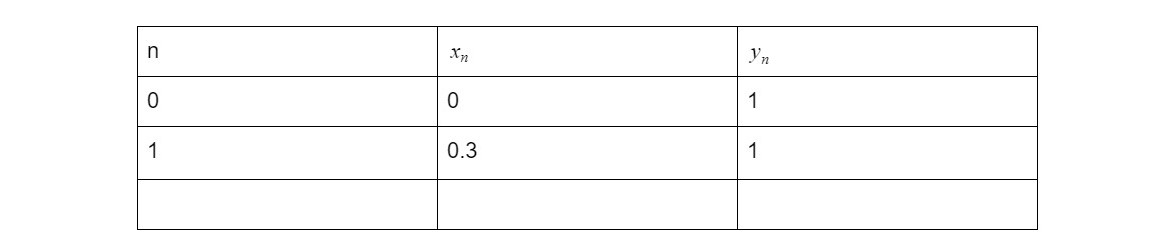

In [34]:
from IPython.display import Image
Image(filename="img/table3.jpg",width=400,height=400)

In [35]:
printTable(compute("x**2", 0.3, 0.3, 1, euler))

n   xn                  yn
0   0                   1              
1   0.3                 1.0            


We keep repeating this till we reach x = 1.5.

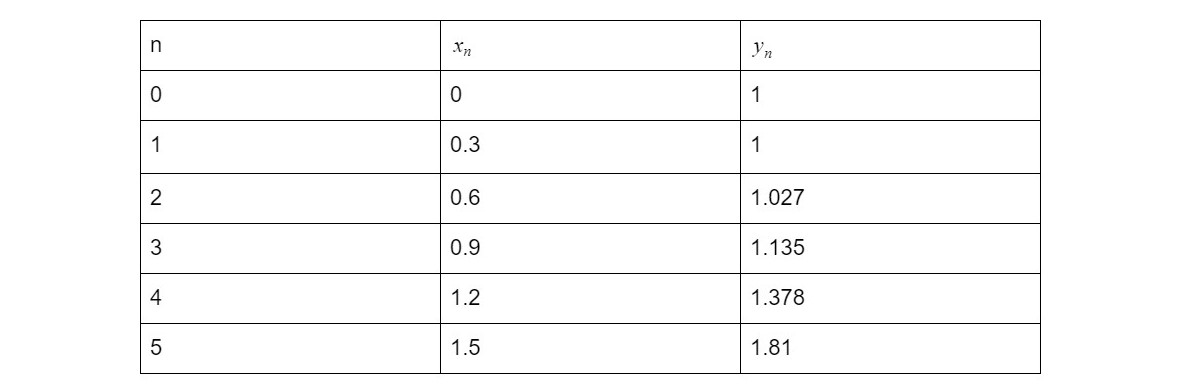

In [36]:
from IPython.display import Image
Image(filename="img/table4.jpg",width=400,height=400)

In [37]:
printTable(compute("x**2", 0.3, 1.5, 1, euler))

n   xn                  yn
0   0                   1              
1   0.3                 1.0            
2   0.6                 1.027          
3   0.9                 1.135          
4   1.2                 1.378          
5   1.5                 1.81           


Finally, we reach our final approximation of y(1.5) Using Euler’s method. Let’s see the percentage error for our calculations:

To get the actual value, we need to input the x value to the original function of y. Which is the integral of our derivative function:

$$\int x^2 dx$$

So it becomes:

$$y = \frac{1}{3}x^3 + c$$



To get the value of the constant c, we can use our initial value of y(0) = 1, and input it into the function.

$$1 = \frac{1}{3}0^3 + c$$
$$1 = c$$

So our final function will be:

$$y = \frac{1}{3}x^3 + 1$$

With this information, we can finally get our actual value, and calculate the percentage error:

Actual value ($y = \frac{1}{3}1.5^3+1$) = 2.125

Experimental value = 1.81

Percentage Error:

$$e = \frac{2.125-1.81}{2.125}100\% = 14.824\%$$

That is actually a pretty big error, so how can we minimize this error? The answer lies in the step size. The smaller the step size, the more slices there are, the more accurate our approximation will be. Let’s do the same problem but with a step size of 0.1:

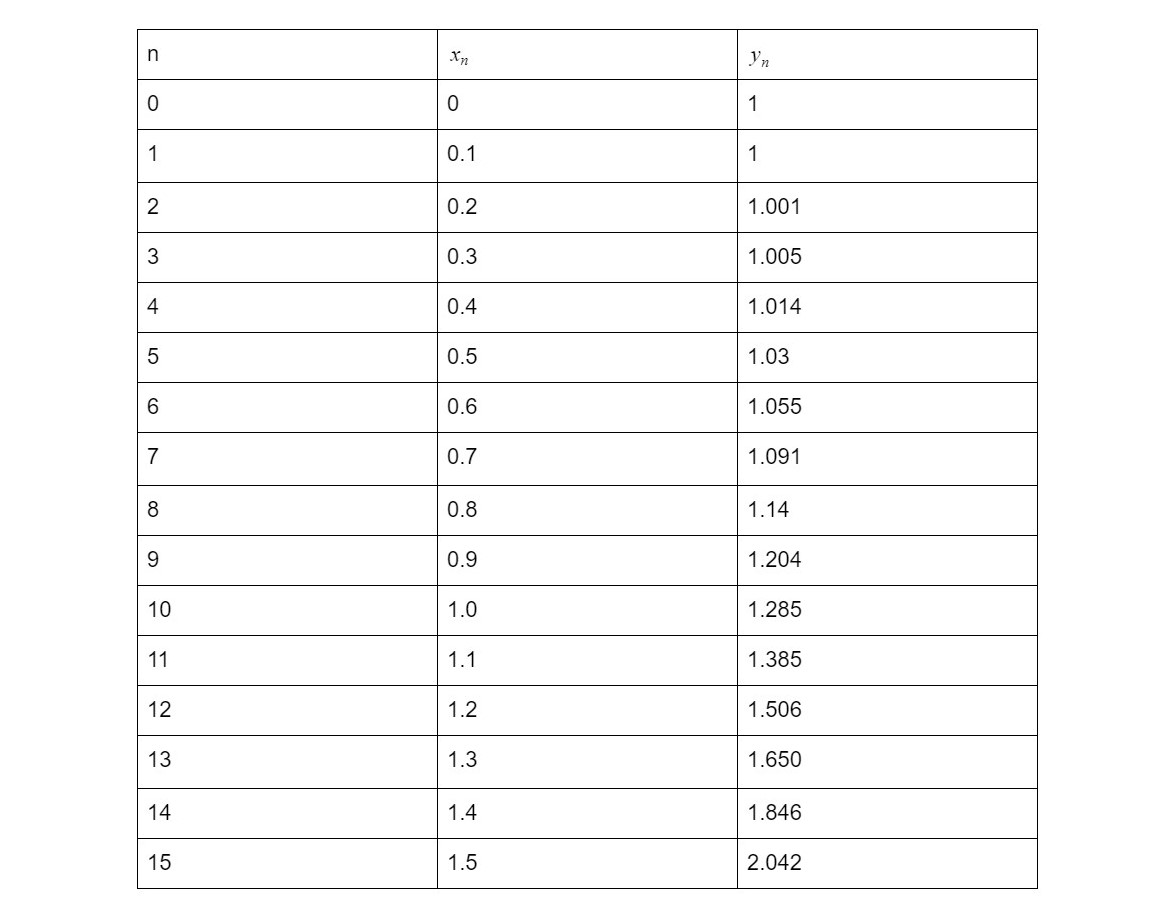

In [38]:
from IPython.display import Image
Image(filename="img/table5.jpg",width=400,height=400)

In [39]:
printTable(compute("x**2", 0.1, 1.5, 1, euler))

n   xn                  yn
0   0                   1              
1   0.1                 1.0            
2   0.2                 1.001          
3   0.3                 1.005          
4   0.4                 1.014          
5   0.5                 1.03           
6   0.6                 1.055          
7   0.7                 1.091          
8   0.8                 1.14           
9   0.9                 1.204          
10  1.0                 1.285          
11  1.1                 1.385          
12  1.2                 1.506          
13  1.3                 1.65           
14  1.4                 1.819          
15  1.5                 2.015          


As you can see, a smaller step size will result in more slices, which means more calculations. But that will be worth it because we got a different approximation compared to our table with h = 0.3. Let’s calculate the percentage error for this one:

Actual value ($y = \frac{1}{3}1.5^3+1$) = 2.125

Experimental value = 2.042

Percentage Error:

$$e = \frac{2.125-2.042}{2.125}100\% = 3.906\%$$

That is about a 10% decrease in error! Which is a very big change. We can take it a step further, let’s see what our approximation will be with a step size of 0.05.

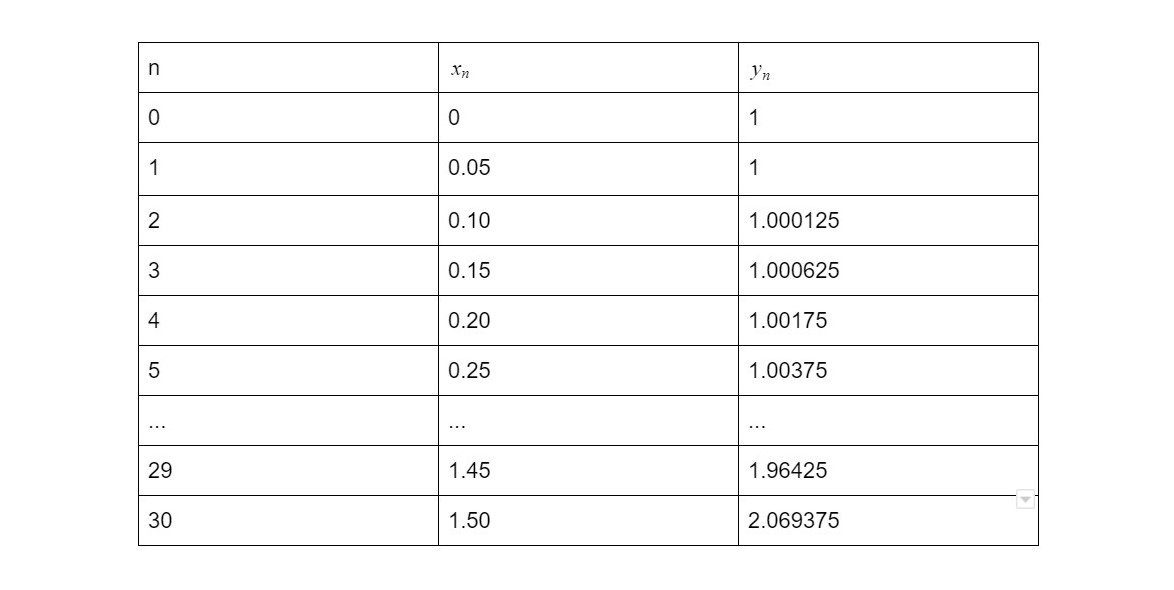

In [40]:
from IPython.display import Image
Image(filename="img/table6.jpg",width=400,height=400)

In [41]:
printTable(compute("x**2", 0.05, 1.5, 1, euler))

n   xn                  yn
0   0                   1              
1   0.05                1.0            
2   0.1                 1.000125       
3   0.15                1.000625       
4   0.2                 1.00175        
5   0.25                1.00375        
6   0.3                 1.006875       
7   0.35                1.011375       
8   0.4                 1.0175         
9   0.45                1.0255         
10  0.5                 1.035625       
11  0.55                1.048125       
12  0.6                 1.06325        
13  0.65                1.08125        
14  0.7                 1.102375       
15  0.75                1.126875       
16  0.8                 1.155          
17  0.85                1.187          
18  0.9                 1.223125       
19  0.95                1.263625       
20  1.0                 1.30875        
21  1.05                1.35875        
22  1.1                 1.413875       
23  1.15                1.474375       
24  1.2      

As we can see, simply dividing the step size to 0.05 doesn’t make that huge of a difference compared to the previous examples. Time to calculate the percentage error:

Actual value ($y = \frac{1}{3}1.5^3+1$) = 2.125

Experimental value = 2.069375

Percentage Error:

$$e = \frac{2.125-2.069375}{2.125}100\% = 2.618\%$$

<h2>2) Runge-Kutta 4th Order (RK4)</h2>

As mentioned earlier, there are several methods you can use to solve Initial Value Problems, one of them is called Runge-Kutta 4th Order. This method is way more precise and accurate, and it’s because of the formula used.

The formula for the Runge-Kutta 4th Order is as follow:

$$K_1 = f(x_n,y_n)$$
$$K_2 = f(x_n + \frac{h}{2}, y_n + \frac{K_1}{2})$$
$$K_3 = f(x_n + \frac{h}{2}, y_n + \frac{K_2}{2})$$
$$K_4 = f(x_n + h, y_n + K_3)$$
$$y_{n+1} = y_n + (\frac{K_1}{6} + \frac{K_2}{3} + \frac{K_3}{3} + \frac{K_4}{6})h$$

<h4>If we implement the code, it will look like this:</h4>

In [42]:
# The python code implementation of 4th Order Runge-Kutta method.
def rk4(x, y, h, f):
    k1 = f(x, y)
    k2 = f(x + 1/2*h, y + 1/2*h*k1)
    k3 = f(x + 1/2*h, y + 1/2*h*k2)
    k4 = f(x + h, y + k3*h)

    return y + (1/6 * (k1 + 2*k2 + 2*k3 + k4)) * h

As you can see, it’s very different compared to the previous, Euler’s Method. This is because the Runge-Kutta 4th Order has 5 steps of calculation making it way more precise.

Now with 5 steps, we have to make a bigger table, one that looks like this:


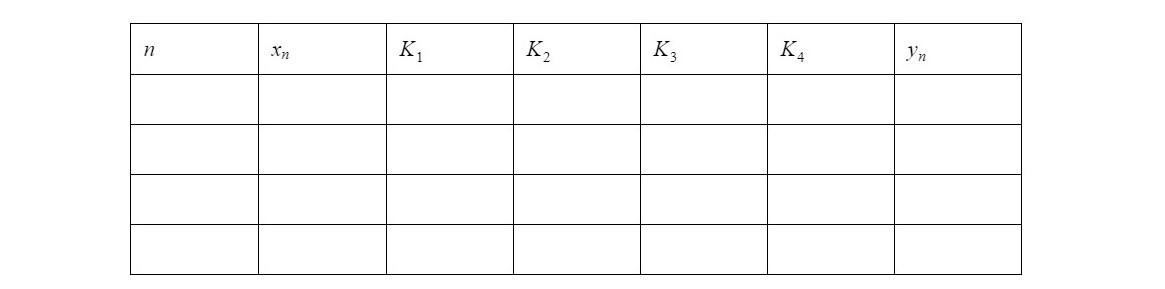

In [43]:
from IPython.display import Image
Image(filename="img/table7.jpg",width=400,height=400)

In [44]:
printTable([[], []])

n   xn                  yn


Just like last time,  got an initial value of y(0) = 1, and a step size of 0.3. Let’s use the Runge-Kutta 4th Order to complete this table:

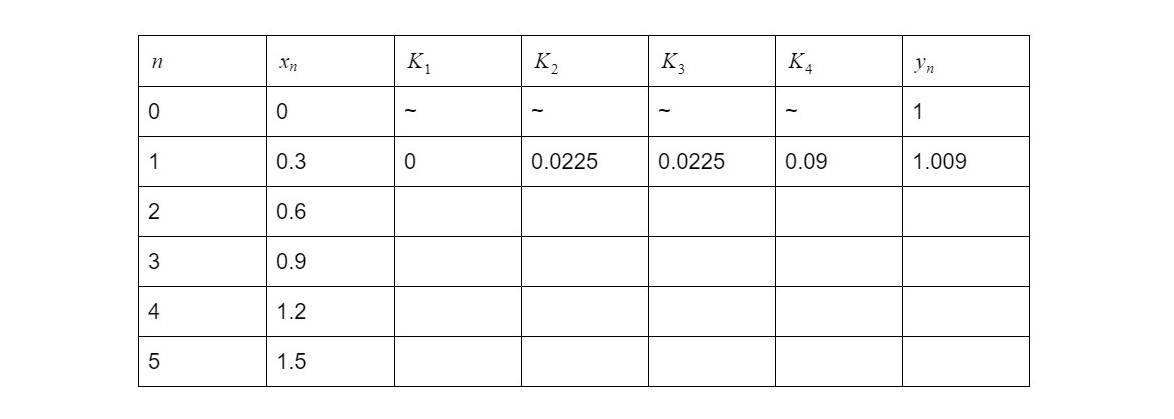

In [45]:
from IPython.display import Image
Image(filename="img/table8.jpg",width=400,height=400)

In [46]:
printTable(compute("x**2", 0.3, 0.3, 1, rk4))

n   xn                  yn
0   0                   1              
1   0.3                 1.009          


Since we already have the initial value of y(0), we don’t really need to calculate all the K’s. Now we do the same thing till we reach x = 1.5.

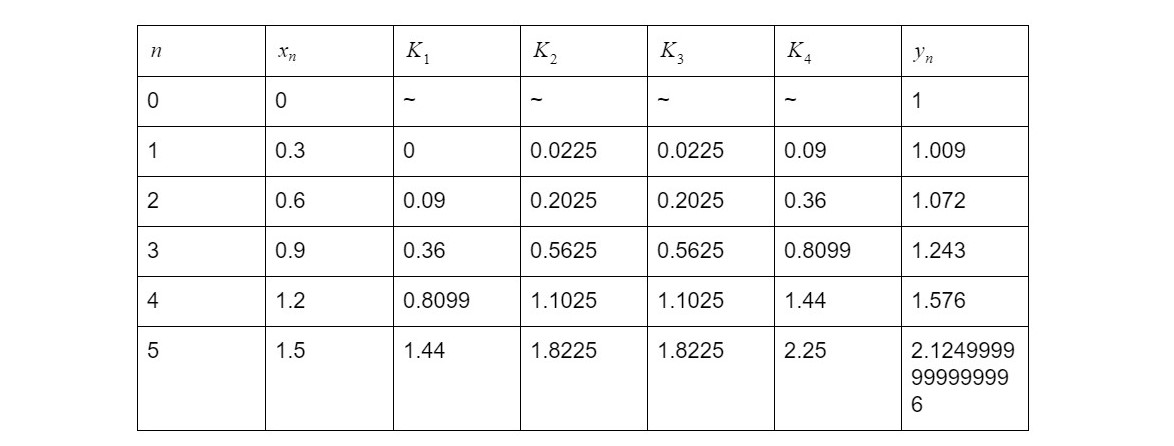

In [47]:
from IPython.display import Image
Image(filename="img/table9.jpg",width=400,height=400)

In [48]:
printTable(compute("x**2", 0.3, 1.5, 1, rk4))

n   xn                  yn
0   0                   1              
1   0.3                 1.009          
2   0.6                 1.072          
3   0.9                 1.243          
4   1.2                 1.576          
5   1.5                 2.125          


As you can see, with only 5 slices, we get a really close approximation. Let’s calculate the percentage error:

Actual value ($y = \frac{1}{3}1.5^3+1$) = 2.125

Experimental value = 2.1249999999999996

Percentage Error:

$$e = \frac{2.125-2.1249999999999996}{2.125}100\% = 2.08983157\times 10^{-14}\%$$

That is a super small percentage error, that is just 0.0000000000000208983158%.
This shows how precise and effective the Runge-Kutta 4th Order is, even with a step size of 0.3. There is a huge difference between using Runge-Kutta 4th Order and Euler’s. 


<h2>Implementation of Initial Value Problem</h2>

There aren’t many useful real life applications for IVP, one example is for Kinetic Equations in Neutral Transport**. It uses initial value problem for the linear kinetic equation which is shown below:

$$\frac{\vartheta u}{\vartheta t} (x,v,t) + v \frac{\vartheta u}{\vartheta t} (x,v,t) + v(x,v)u(x,v,t) = \int_V k(x,\hat v \to v)u(x,\hat v, t)d\lambda(\hat v) + q(x,v,t)  $$

With an initial condition of

$$\lim_{t\to0} u(x,v,t) = u_0(x,v)$$

Here, the function v(x,v) is the total cross section in neutron transport, the extinction coefficient in radiative transfer, and the collision frequency in gas dynamics. While q(x,v,t) is an inhomogeneous term which accounts for internal particles or radiation sources.
The kernel, k(x,$\hat v \to v$)is called the scattering kernel in neutron transport. 

<h2>RESOURCES</h2>

** https://link.springer.com/chapter/10.1007/978-3-0348-5478-8_13
Greenberg W., van der Mee C., Protopopescu V. (1987) Applications of the Initial Value Problem. In: Boundary Value Problems in Abstract Kinetic Theory. Operator Theory: Advances and Applications, vol 23. Birkhäuser, Basel
